In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('D:/HTML/Hannan/insurance_claims_fraud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
# we can see some missing values denoted by '?' so lets replace missing values with NaN

df.replace('?', np.nan, inplace = True)

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0]) # Filling the missing values with the most occurring value

In [9]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [10]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [11]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [12]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

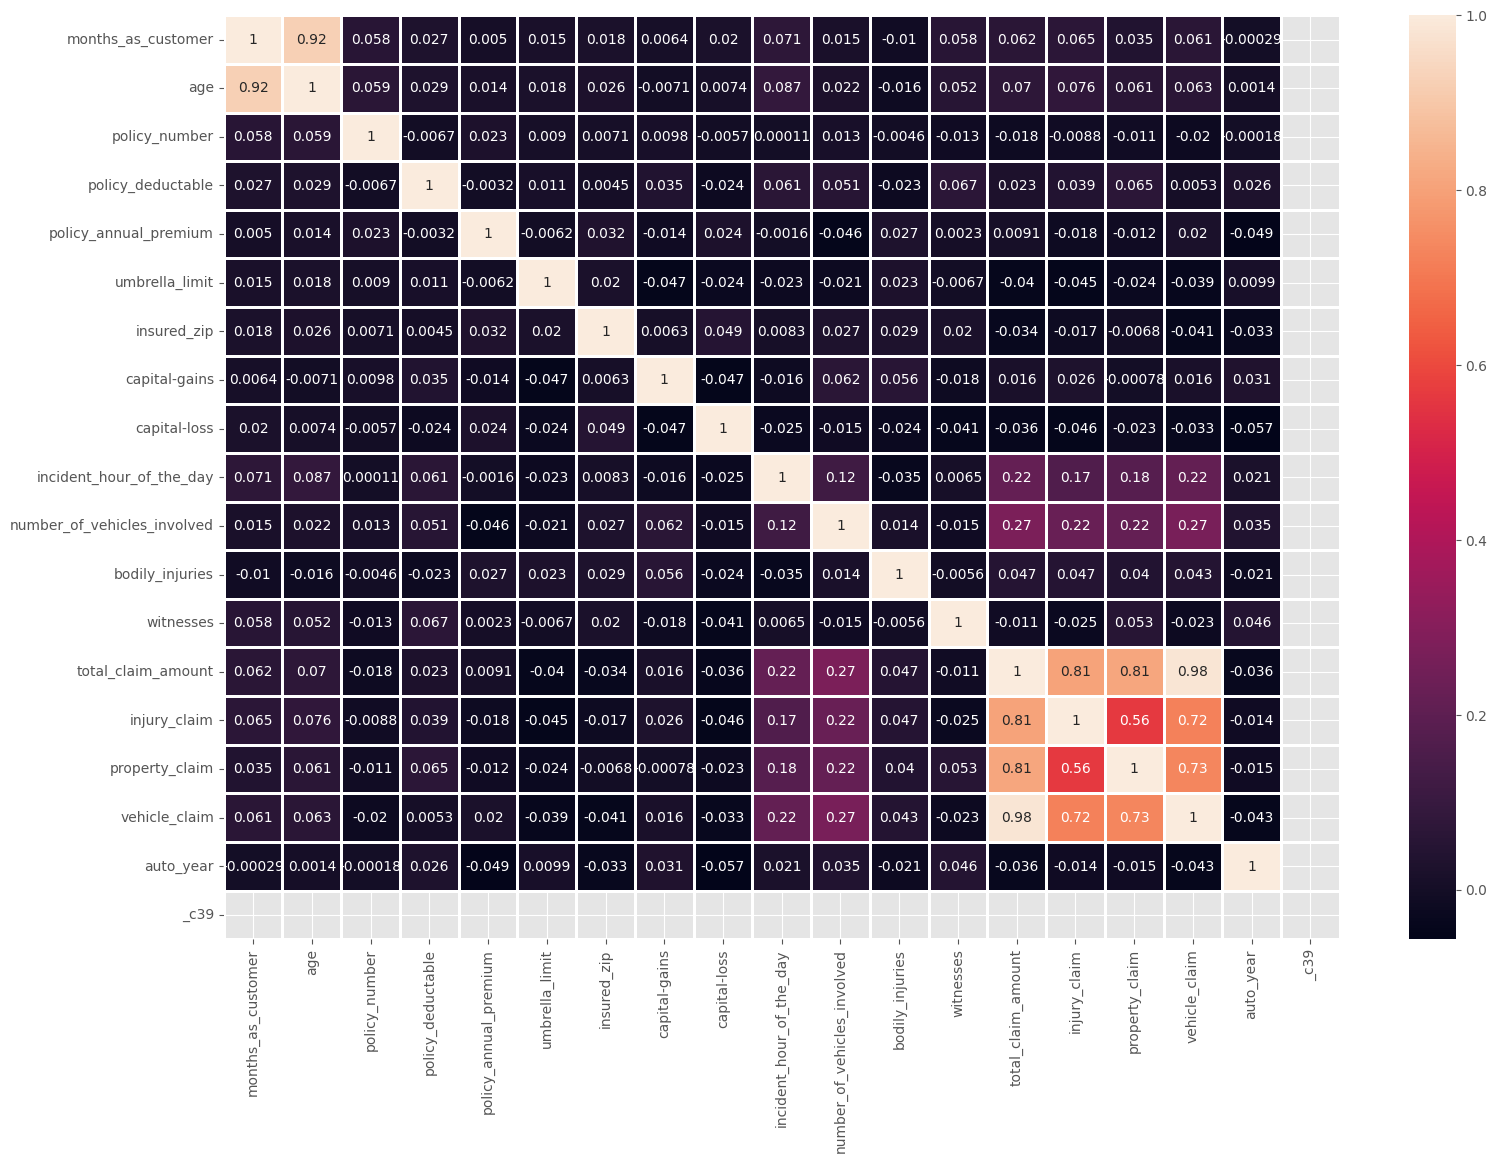

In [14]:
# heatmap

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_columns].corr()

plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1)
plt.show()


In [15]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [16]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1) # Drops specified columns from the Dataframe

In [17]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [18]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

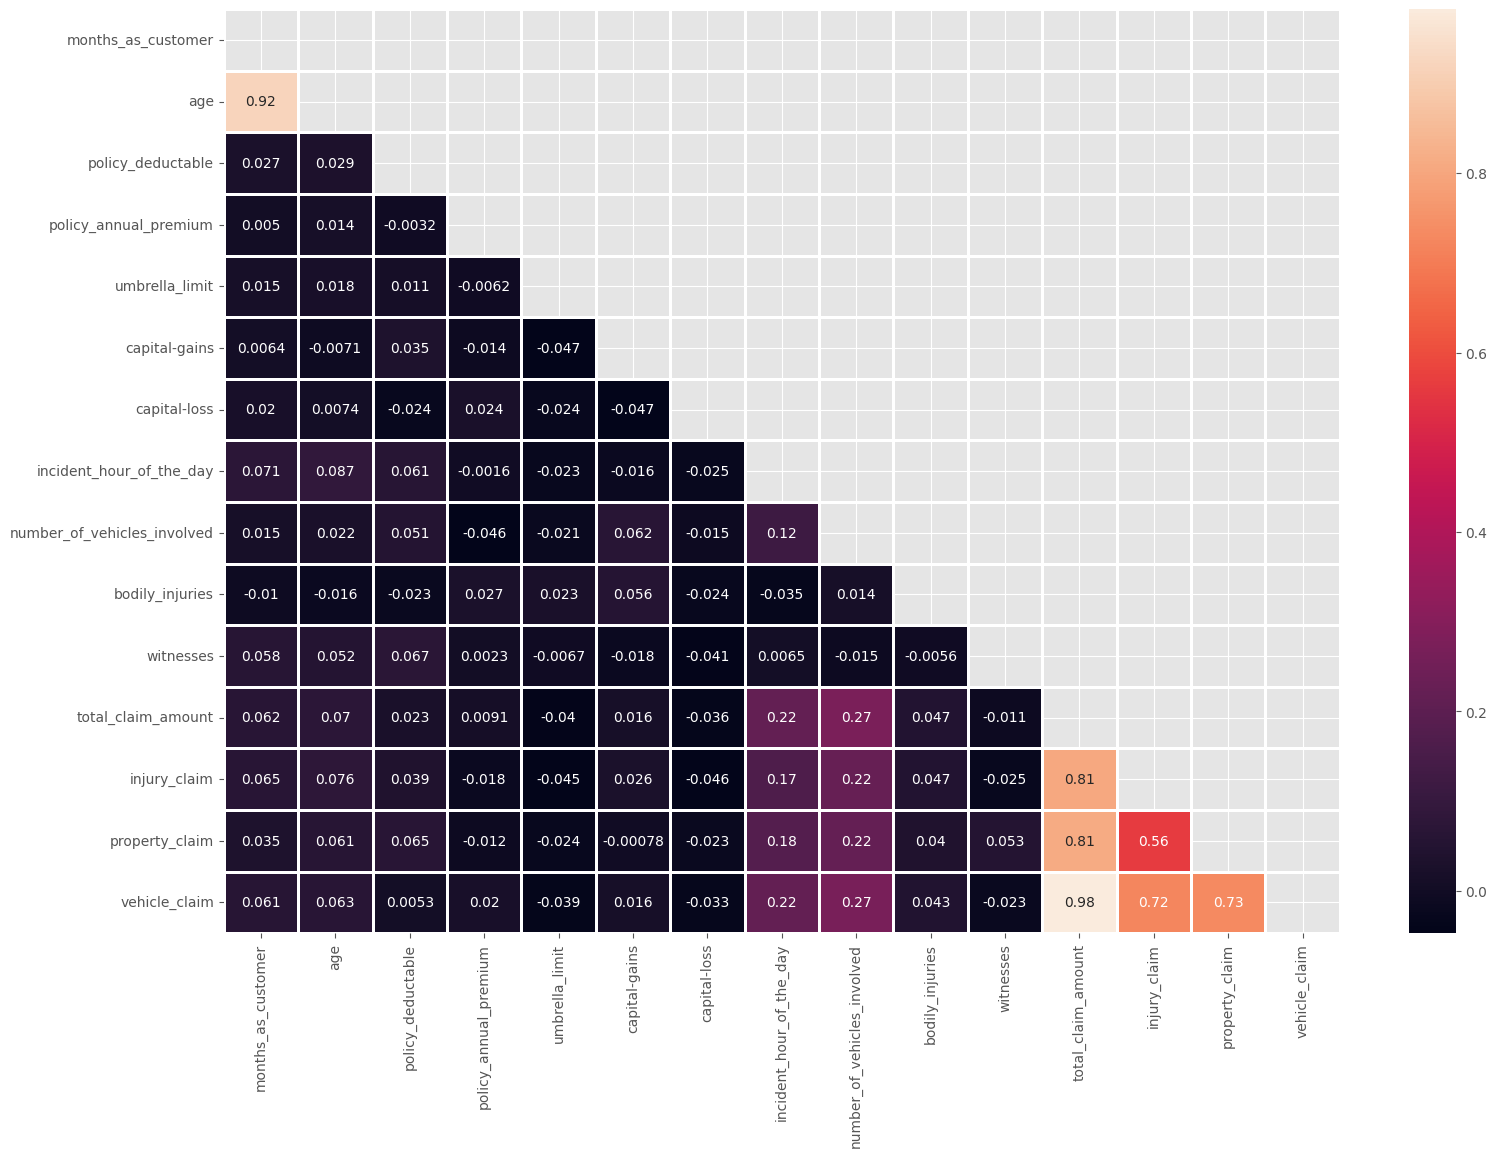

In [21]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_columns].corr()
# Creating a mask to hide the upper triangle of the heat map so we don't see duplicate information.
mask = np.triu(np.ones_like(corr, dtype = bool)) # matrix of the same shape as corr, filled with ones --> Converting it into bool
# np. triu is used to keep only the upper triangle as True and the rest to False

sns.heatmap(data = corr, mask= mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [22]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [23]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [25]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)  # Feature columns obtain by dropping fraud_reported 
y = df['fraud_reported'] # Target column

### Encoding Cateorical Column

In [26]:
# Extracting categorical columns from X
cat_df = X.select_dtypes(include = ['object'])

In [27]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO


In [28]:
# printing unique values of each column

for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [30]:
# Convertung categoical variables into numerical by creating dummy variables and dropping the first category level to avid multicollinearity issues

cat_df = pd.get_dummies(cat_df, drop_first = True)

In [31]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [32]:
# Extracting the numerical columns from X

num_df = X.select_dtypes(include = ['int64'])

In [33]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [34]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [35]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,True,False,False,False,False,True,False,False


### Outliers

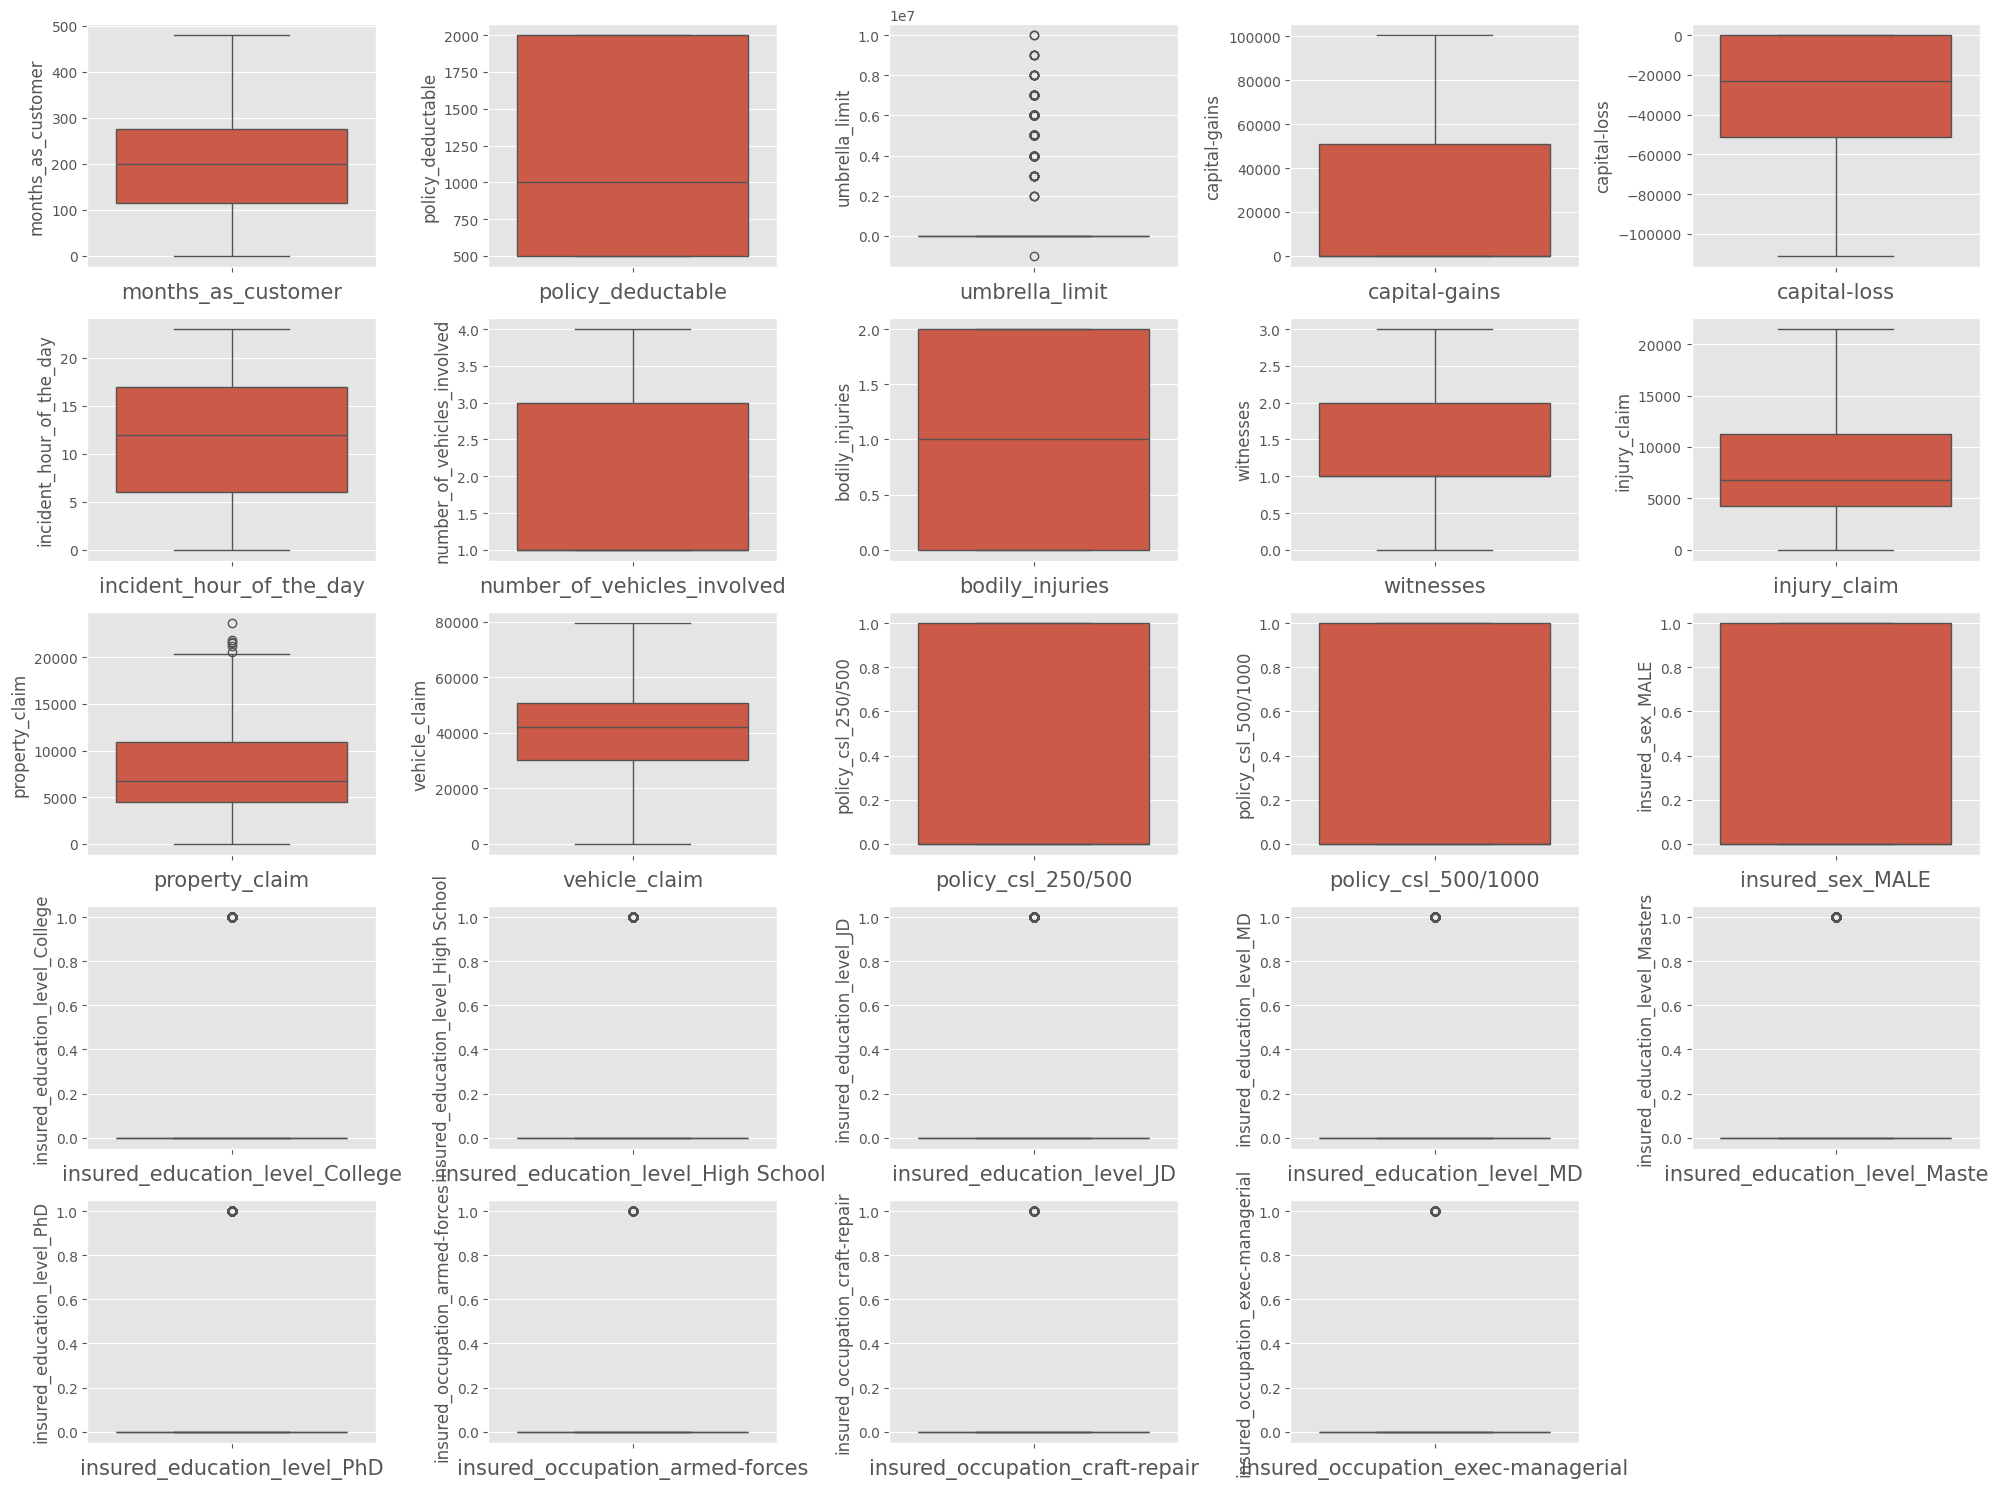

In [36]:
plt.figure(figsize = (20, 15))  # width = 20 inches and height = 15 inches
plotnumber = 1                  

for col in X.columns:
    if plotnumber <= 24:                                # To plot 24 plots
        ax = plt.subplot(5, 5, plotnumber)     # Creates a plot 1 by 1 in a 5x5 grid layout
        sns.boxplot(X[col])                   
        plt.xlabel(col, fontsize = 15)    
    
    plotnumber += 1
plt.tight_layout()    
plt.show()

### Scaling

In [37]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [38]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
175,324,2000,6000000,0,-41300,13,1,1,0,15920,...,True,False,True,False,False,False,True,False,False,True
607,236,1000,4000000,0,-63900,17,1,0,0,870,...,True,False,True,False,False,False,False,True,True,False
90,127,2000,5000000,0,0,12,2,1,1,10300,...,False,False,False,True,False,True,False,False,True,False
693,134,1000,0,14100,-44500,17,3,2,0,9650,...,False,True,True,False,False,False,False,False,False,True
514,479,2000,0,0,0,18,1,0,0,5050,...,True,False,False,True,False,False,False,False,False,False


In [39]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]              # Creating a new DataFrame num_df with only these selected columns (from X_train)

In [40]:
# Scaling the numeric values in the dataset so that all features contribute equally to the model's learning process, preventing certain features from dominating.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df) # Scales the numerical features in num_df using StandardScaler

In [41]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index) # Creating a new dataframe from scaled_data
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
175,1.019320,1.446869,2.120629,-0.896714,-0.536855,0.186109,-0.830902,0.044090,-1.335973,1.730616,1.796950,0.510606
607,0.258212,-0.203552,1.253415,-0.896714,-1.339942,0.762894,-0.830902,-1.180621,-1.335973,-1.346703,-1.184570,-1.690599
90,-0.684525,1.446869,1.687022,-0.896714,0.930733,0.041913,0.144335,0.044090,-0.427560,0.581478,0.615275,0.436124
693,-0.623982,-0.203552,-0.481015,-0.391697,-0.650567,0.762894,1.119572,1.268800,-1.335973,0.448570,0.478605,1.046249
514,2.359909,1.446869,-0.481015,-0.896714,0.930733,0.907090,-0.830902,-1.180621,-1.335973,-0.492006,0.573223,0.388581


In [42]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)  # Removes columns from X_train that match the columns in scaled_num_df.

In [43]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)   # Concatenating scaled_num_df with X_train 

In [44]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
175,1.019320,1.446869,2.120629,-0.896714,-0.536855,0.186109,-0.830902,0.044090,-1.335973,1.730616,...,True,False,True,False,False,False,True,False,False,True
607,0.258212,-0.203552,1.253415,-0.896714,-1.339942,0.762894,-0.830902,-1.180621,-1.335973,-1.346703,...,True,False,True,False,False,False,False,True,True,False
90,-0.684525,1.446869,1.687022,-0.896714,0.930733,0.041913,0.144335,0.044090,-0.427560,0.581478,...,False,False,False,True,False,True,False,False,True,False
693,-0.623982,-0.203552,-0.481015,-0.391697,-0.650567,0.762894,1.119572,1.268800,-1.335973,0.448570,...,False,True,True,False,False,False,False,False,False,True
514,2.359909,1.446869,-0.481015,-0.896714,0.930733,0.907090,-0.830902,-1.180621,-1.335973,-0.492006,...,True,False,False,True,False,False,False,False,False,False


## Model

KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30) # KNN algorithm will look at the labels of the 30 closest data points to decide its classification
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [46]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculating the training and test accuracy of the KNN classifier
knn_train_acc = accuracy_score(y_train, knn.predict(X_train)) # Comparing true label(y_train) with predicted label(knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred) # Comparing true label(y_test) with predicted label(y_pred)

# printing the training and test accuracy scores of the KNN classifier.
print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

# Prints the confusion matrix, which shows the number of true positives, true negatives, false positives, and false negatives.
print(confusion_matrix(y_test, y_pred))

# Printing the classification report, that includes precision, recall, F1-score, and support for each class.
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7493333333333333
Test accuracy of KNN is : 0.764
[[191   0]
 [ 59   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.87       191
           Y       0.00      0.00      0.00        59

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.58      0.76      0.66       250



Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [48]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculating the training and test accuracy of the Decision Tree Classifier
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

# printing the training and test accuracy scores of the Decision Tree Classifier
print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

# Printing confusion matrix
print(confusion_matrix(y_test, y_pred))

# Printing the classification report, that includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.416
[[ 61 130]
 [ 16  43]]
              precision    recall  f1-score   support

           N       0.79      0.32      0.46       191
           Y       0.25      0.73      0.37        59

    accuracy                           0.42       250
   macro avg       0.52      0.52      0.41       250
weighted avg       0.66      0.42      0.44       250



In [49]:
# Since we have got less train and test accuracy we are doing hyper parameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV 

grid_params = {                                 
    'criterion' : ['gini', 'entropy'],           # Function to measure the quality of a split.
    'max_depth' : [3, 5, 7, 10],                 # maximum depth of the tree
    'min_samples_split' : range(2, 10, 1),       # minimum number of samples required to split a node
    'min_samples_leaf' : range(2, 10, 1)         # minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [50]:
# best parameters and best score of grid search cv

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}
0.808


In [51]:
# best estimator 

dtc = grid_search.best_estimator_  # Returns best model found by GridSearchCV after testing all the combinations of hyperparameters.

y_pred = dtc.predict(X_test)  # Making predictions on the test data 

In [52]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculating the training and test accuracy of the Decision Tree Classifier
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

# printing the training and test accuracy scores of the Decision Tree Classifier
print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

# Printing confusion matrix
print(confusion_matrix(y_test, y_pred))

# Printing the classification report, that includes precision, recall, F1-score, and support for each class.
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.808
Test accuracy of Decision Tree is : 0.732
[[143  48]
 [ 19  40]]
              precision    recall  f1-score   support

           N       0.88      0.75      0.81       191
           Y       0.45      0.68      0.54        59

    accuracy                           0.73       250
   macro avg       0.67      0.71      0.68       250
weighted avg       0.78      0.73      0.75       250



Randam Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier


rand_clf = RandomForestClassifier()   
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [54]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculating the training and test accuracy of the Random Forest Classifier
rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

# printing the training and test accuracy scores of the Decision Tree Classifier
print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

# Printing confusion matrix
print(confusion_matrix(y_test, y_pred))

# Printing the classification report, that includes precision, recall, F1-score, and support for each class.
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 1.0
Test accuracy of Random Forest is : 0.76
[[155  36]
 [ 24  35]]
              precision    recall  f1-score   support

           N       0.87      0.81      0.84       191
           Y       0.49      0.59      0.54        59

    accuracy                           0.76       250
   macro avg       0.68      0.70      0.69       250
weighted avg       0.78      0.76      0.77       250



In [55]:
# Since we have got less train and test accuracy we are doing hyper parameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV 

grid_params = {                                  
    'criterion' : ['gini', 'entropy'],           
    'max_depth' : [3, 5, 7, 10],                 
    'min_samples_split' : range(2, 10, 1),     
    'min_samples_leaf' : range(2, 10, 1)       
}

grid_search = GridSearchCV(rand_clf, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [56]:
# best parameters and best score of grid search cv

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7639999999999999


In [57]:
# best estimator 

rand_clf = grid_search.best_estimator_  # Returns best model found by GridSearchCV after testing all the combinations of hyperparameters.

y_pred = rand_clf.predict(X_test)  

In [58]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculating the training and test accuracy of the Random Forest Classifier
rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

# printing the training and test accuracy scores of the Decision Tree Classifier
print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

# Printing confusion matrix
print(confusion_matrix(y_test, y_pred))

# Printing the classification report, that includes precision, recall, F1-score, and support for each class.
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9306666666666666
Test accuracy of Random Forest is : 0.76
[[156  35]
 [ 25  34]]
              precision    recall  f1-score   support

           N       0.86      0.82      0.84       191
           Y       0.49      0.58      0.53        59

    accuracy                           0.76       250
   macro avg       0.68      0.70      0.68       250
weighted avg       0.77      0.76      0.77       250



By using these different classification models, we want to get better at identifying fraudulent insurance claims. This will help reduce money lost due to fraud and improve how accurately we review claims. Each model has its own strengths and weaknesses. By testing them all, we can find the model that works best for our specific data and needs.